In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

# 导入依赖
import warnings

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


要对未来回归变量进行建模，必须知道这些回归变量的过去和未来值。因此，与上一教程中的滞后回归变量相比，未来回归变量除了历史值外，还具有未来的预测值。

加载一个新数据集，其中也包含温度。

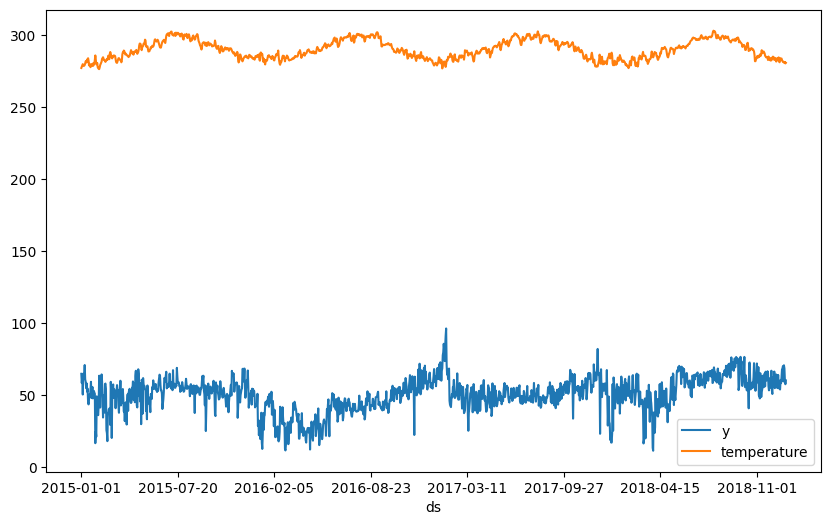

In [3]:
import pandas as pd

# Load the dataset for tutorial 4 with the extra temperature column
df = pd.read_csv("/home/ann/opt/iNeuralProphet/data/tutorial04.csv")
df.head()
fig = df.plot(x="ds", y=["y", "temperature"], figsize=(10, 6))

In [4]:
# Model and prediction
m = NeuralProphet(
    n_changepoints=10,
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    n_lags=10,  # Autogression
)
m.set_plotting_backend("plotly-static")

# Add the new future regressor
m.add_future_regressor("temperature")

# Continue training the model and making a prediction
metrics = m.fit(df)
forecast = m.predict(df)

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/229 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

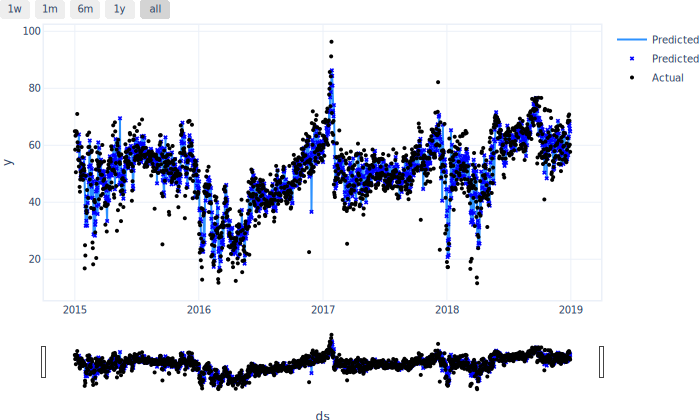

In [5]:
# set plotting to focus on forecasting horizon 1 (the only one for us here)
m.highlight_nth_step_ahead_of_each_forecast(1)
m.plot(forecast)

绘制成分分解图  趋势、季节性等因素是如何随时间变化并影响预测的

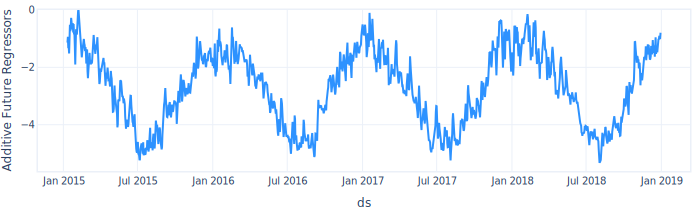

In [6]:
# show the component's forecast contribution
m.plot_components(forecast, components=["future_regressors"])

我们看到温度对预测价格的影响只有几个单位。与整体价格波动相比，温度影响似乎很小，但并非微不足道。

绘制参数系数图  模型认为哪些特征最重要​？其影响程度（系数）有多大

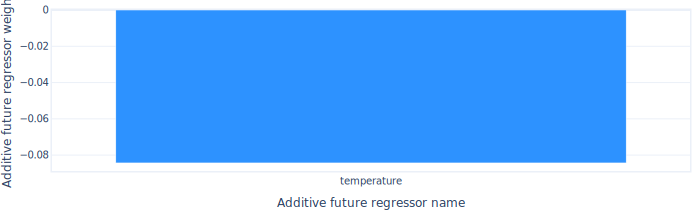

In [7]:
m.plot_parameters(components=["future_regressors"])

In [8]:
metrics

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,2.026026,0.0,152.404495,168.061798,2.018447,0.0,0
1,1.289211,0.0,100.169617,115.000572,1.282761,0.0,1
2,0.687135,0.0,57.797962,70.864357,0.685156,0.0,2
3,0.405128,0.0,37.774704,46.844608,0.403579,0.0,3
4,0.324602,0.0,31.863270,38.704384,0.324007,0.0,4
...,...,...,...,...,...,...,...
95,0.021936,0.0,5.663080,7.548018,0.021861,0.0,95
96,0.021962,0.0,5.640608,7.511049,0.021811,0.0,96
97,0.021936,0.0,5.642258,7.512158,0.021737,0.0,97
98,0.021918,0.0,5.694060,7.571160,0.022058,0.0,98


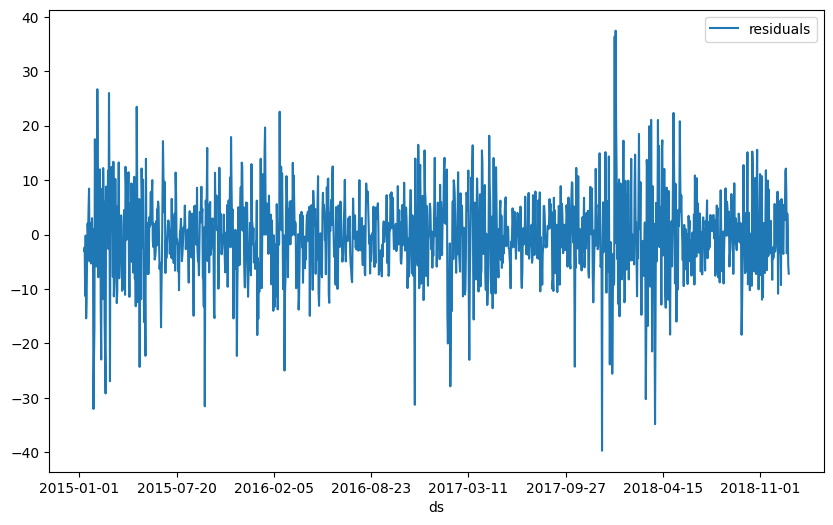

In [9]:
df_residuals = pd.DataFrame({"ds": df["ds"], "residuals": df["y"] - forecast["yhat1"]})
fig = df_residuals.plot(x="ds", y="residuals", figsize=(10, 6))

In [10]:
# 保存 forecast 内容到 csv
forecast.to_csv("forecast.csv", index=False)
